### Process and Visualize IWG data from Arctic Heat

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import cmocean

import pandas as pd
import numpy as np

import os

The original .iwg files have headerlines everyso often through the file.  I usually clean these up by removing all of the lines and adding one iteration of headers at the top of the file and then call these files "clean"

In [47]:
source_dir = '/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/IWG_data/'
source_file = source_dir + '20180525_221008_IWG.clean.dat'

In [48]:
source_file = [x for x in os.listdir(source_dir) if x.endswith('.clean.dat')]

In [49]:
columns = ['IWG1_NAMES','TIME','LAT','LON','ALTGPS','GPS_GEOIDHT','ALTPAFT',
           'ALTRAFT','GS','TAS','IAS','MACH','GSZ','THDG','TRK','DA','PITCH','ROLL',
           'SA','AA','TA','TD','TTM','PS','PQ','PCAB','WS','WD','UWZ','none1','none2',
           'none3','none4','FLID','MISSIONID','STORMID','SST','PYRAUCLEAR','RH']

In [50]:
dfs = {}

In [51]:
for i,filename in enumerate(source_file):
    print(filename)
    dfs.update({filename:pd.read_csv(source_dir + filename,delimiter=',',parse_dates=['TIME'],index_col='TIME')})

20180527_210946_IWG.clean.dat
20180525_221008_IWG.clean.dat


In [52]:
for file in dfs.keys():
    print(dfs[file].head())

                    IWG1_NAMES        LAT         LON  ALTGPS  GPS_GEOIDHT  \
TIME                                                                         
2018-05-27 21:46:28       IWG1   0.000000    0.000000       0          NaN   
2018-05-27 21:46:29       IWG1   0.000000    0.000000       0          NaN   
2018-05-27 21:46:30       IWG1  66.890594 -162.607437       1          NaN   
2018-05-27 21:46:31       IWG1  66.890594 -162.607437       1          NaN   
2018-05-27 21:46:32       IWG1  66.890594 -162.607437       1          NaN   

                     ALTPAFT  ALTRAFT   GS   TAS  IAS  ...   none  none.1  \
TIME                                                   ...                  
2018-05-27 21:46:28        0      -20  0.0  9.59    0  ...    NaN     NaN   
2018-05-27 21:46:29     -100        4  0.0  9.59   18  ...    NaN     NaN   
2018-05-27 21:46:30     -100        4  0.0  9.59   18  ...    NaN     NaN   
2018-05-27 21:46:31     -100        4  0.0  9.60   18  ...    NaN   

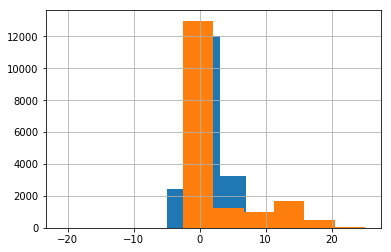

In [53]:
for file in dfs.keys():
    dfs[file]['SST'].hist()

In [54]:
import gmt

In [55]:
fig = gmt.Figure()

fig.coast(region=[-170, -160, 66, 71], projection='B-160/60/55/60/6i', land='black', water='lightgrey',
          frame=True,U=True) 

In [56]:
#fig.show()

In [57]:
#choose temp boundaries
upper_limit = 5
lower_limit = -2

for file in dfs.keys():
    dfmiss = dfs[file].copy()
    dfmiss['SST'].loc[(dfs[file]['SST'] > upper_limit ) | (dfs[file]['SST'] <lower_limit)] = np.nan
    # normalize data for colormap
    dfnorm = dfmiss['SST'].apply(lambda x: (x - (lower_limit)) / (upper_limit - (lower_limit)))
    fig.plot(x=dfs[file].LON.values, y=dfs[file].LAT.values, color=256*dfnorm, cmap='thermal', style='c0.1c')


/Users/bell/anaconda2/envs/gmt-python/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


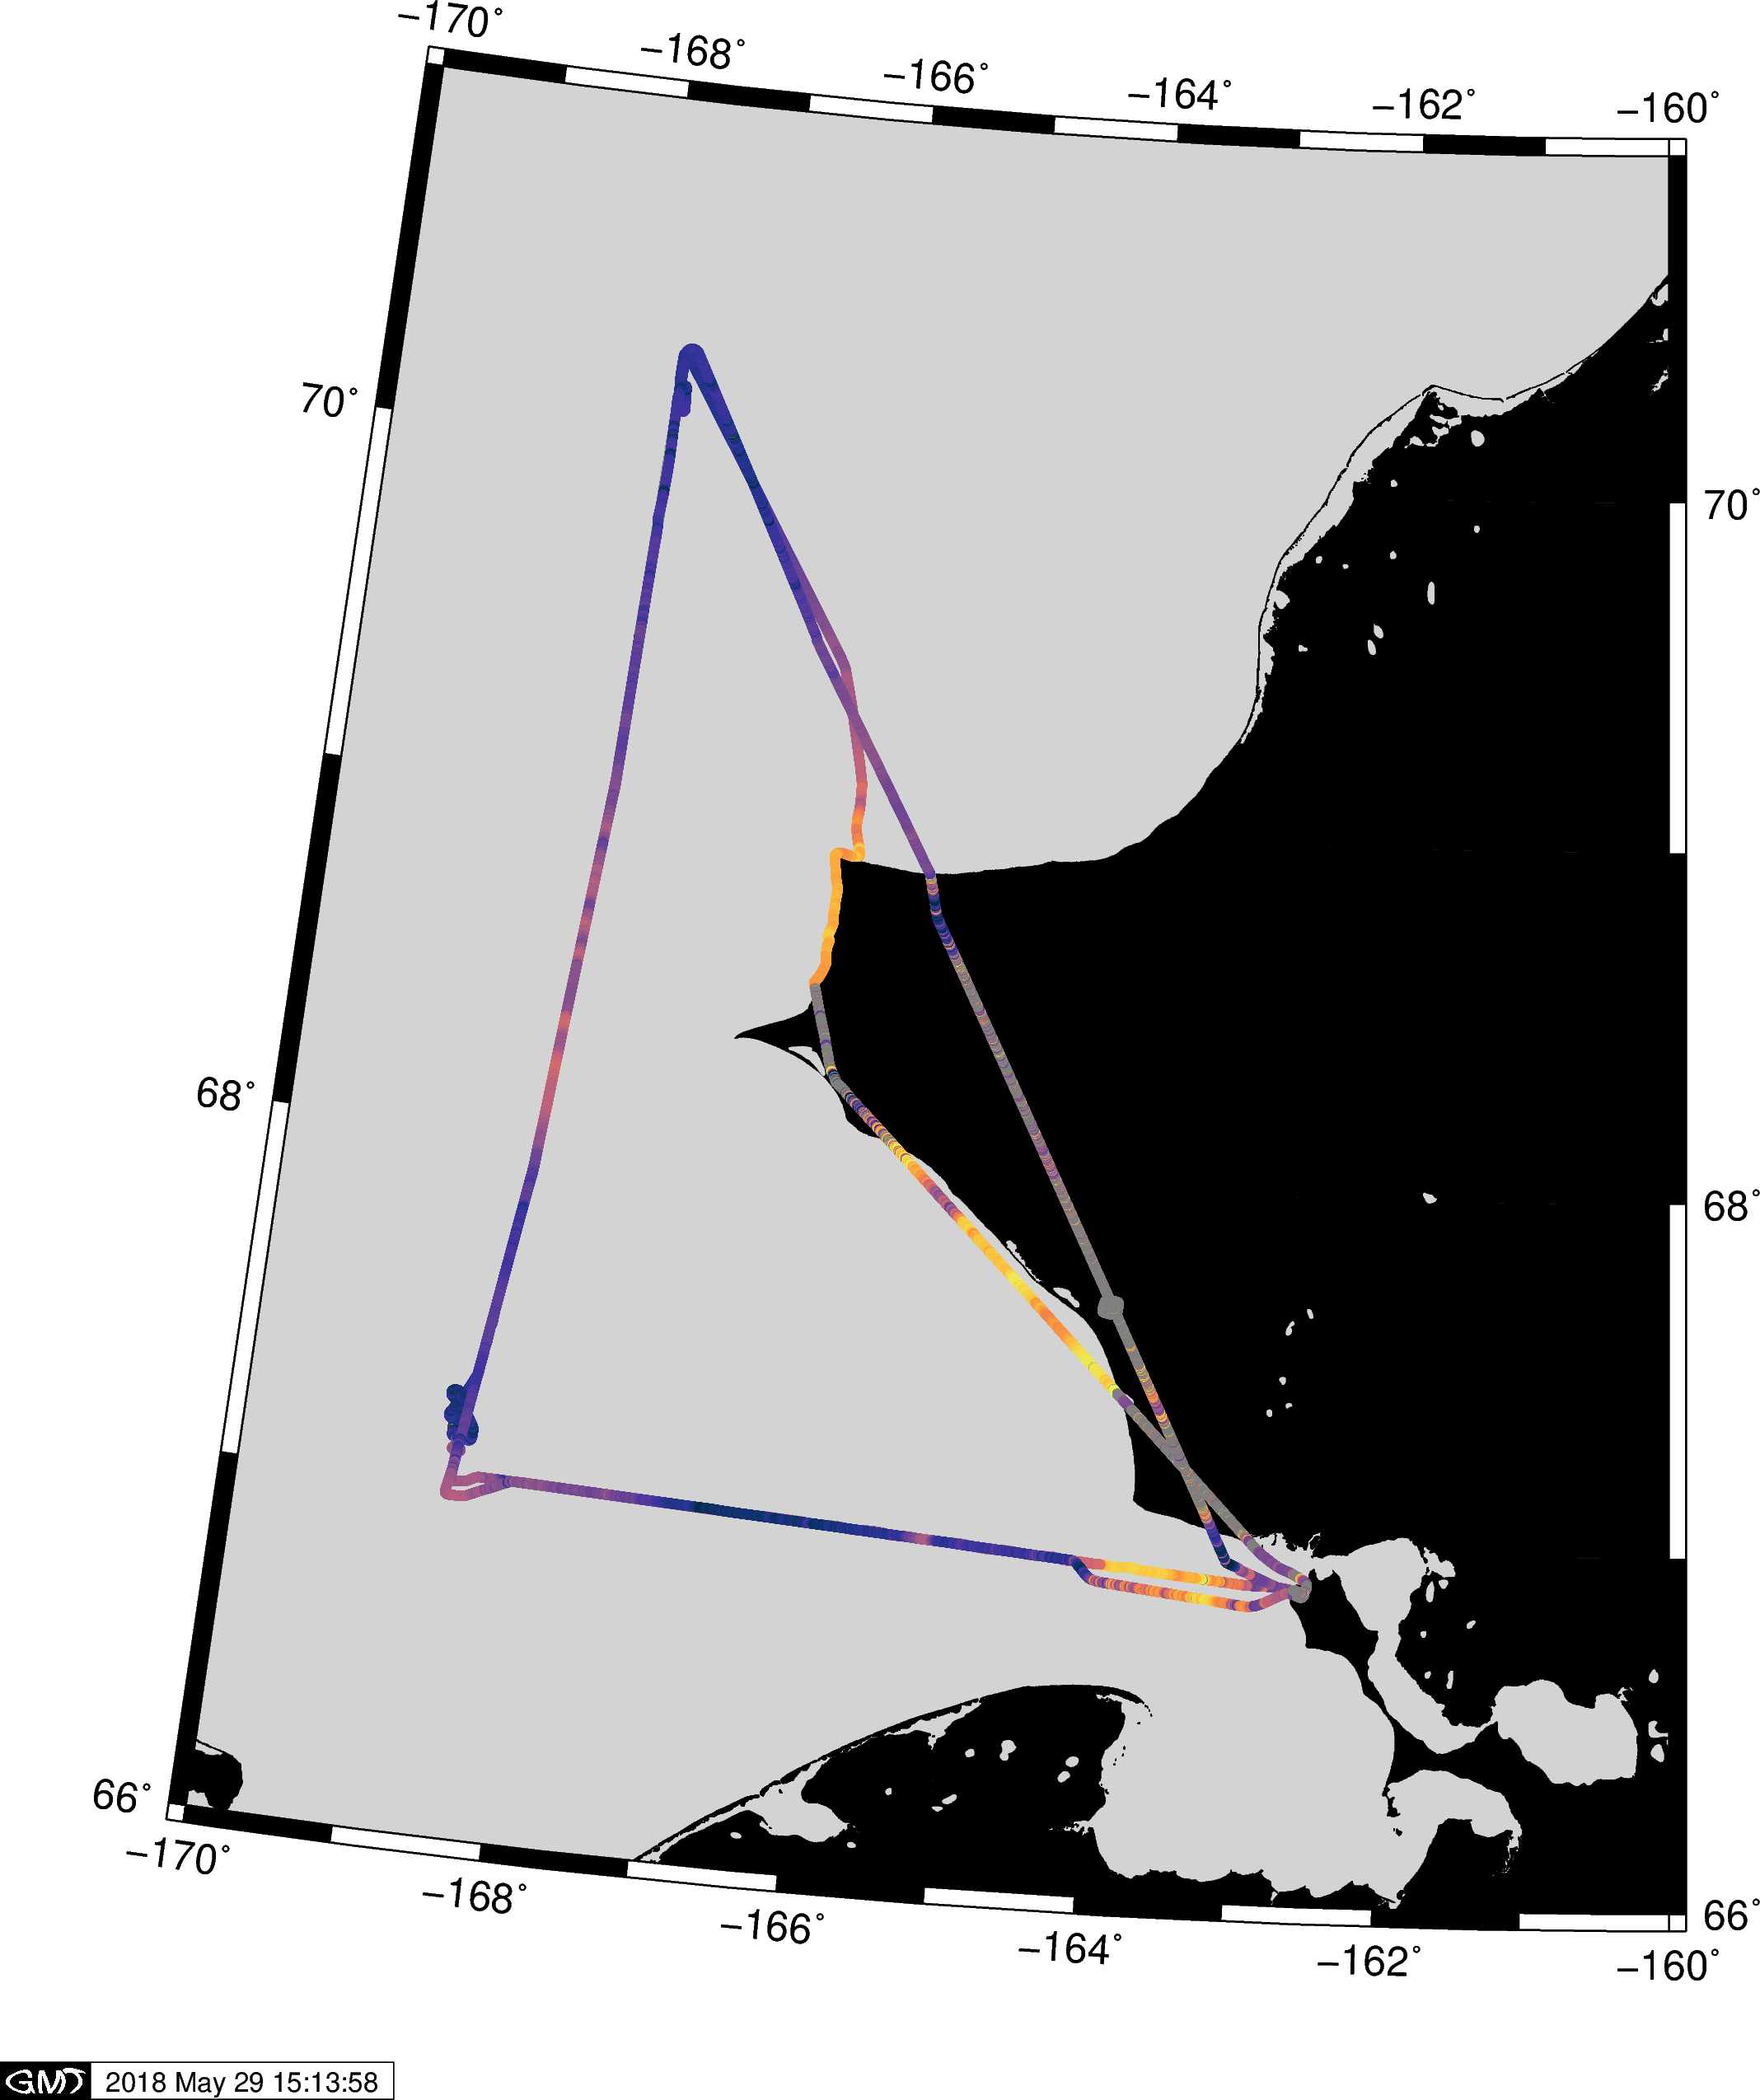

In [58]:
fig.show()

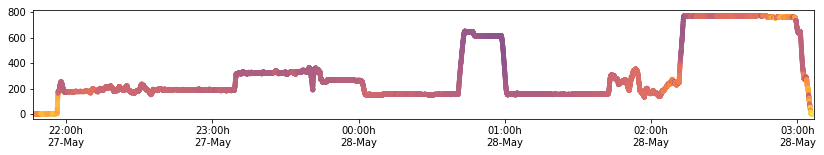

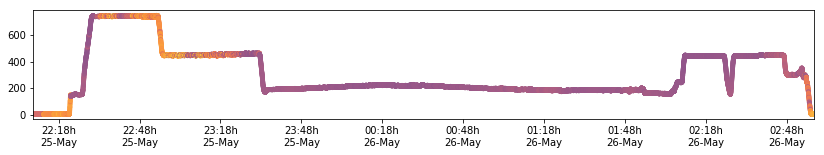

In [59]:
for file in dfs.keys():
    fig = plt.figure(figsize=(14, 2))
    ax1 = fig.add_subplot(111)
    plt.scatter(dfs[file].index,dfs[file]['ALTGPS'],s=15,c=dfs[file]['SST'],cmap=cmocean.cm.thermal)
    ax1.set_xlim(dfs[file].index.min(),dfs[file].index.max())
    xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
    ax1.xaxis.set_major_formatter(xfmt)

In [60]:
def colorbar():

    '''
    ====================
    Customized colorbars
    ====================

    This example shows how to build colorbars without an attached mappable.
    '''

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import cmocean

    # Make a figure and axes with dimensions as desired.
    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    cmap = cmocean.cm.thermal
    norm = mpl.colors.Normalize(vmin=lower_limit, vmax=upper_limit)

    # ColorbarBase derives from ScalarMappable and puts a colorbar
    # in a specified axes, so it has everything needed for a
    # standalone colorbar.  There are many more kwargs, but the
    # following gives a basic continuous colorbar with ticks
    # and labels.
    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    cb1.set_label('Degrees C')

    # The second example illustrates the use of a ListedColormap, a
    # BoundaryNorm, and extended ends to show the "over" and "under"
    # value colors.
    cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
    cmap.set_over('0.25')
    cmap.set_under('0.75')

    plt.show()

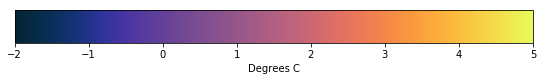

In [61]:
colorbar()